# Simulation of a Galton-Watson Process

This section introduces python code to perform a Galton-Watson epidemic simulation.  

We will spend time in class learning enough python in order to understand this section.  It is not essential to understand this section before moving on in the text.  It may seem intimidating, but if you look at the code, you will see that most of the code is just "comments" explaining how the methods work.

The code below assumes the existence of a method `OffspringDist` which will generate a number from the offspring distribution.  We give some examples of such methods below.


In [ ]:
import numpy as np

def GaltonWatsonSimulation(OffspringDist, num_generations=10):
    """
    Simulate a Galton–Watson branching process.

    This function simulates a discrete-time branching process in which
    each individual in generation g independently produces a random
    number of offspring according to a specified offspring distribution.
    The process starts with a single individual in generation 0 and
    evolves forward for a fixed number of generations.

    Parameters
    ----------
    OffspringDist : callable
        A function (or other callable) with no arguments that returns
        a non-negative integer representing the number of offspring
        produced by a single individual. Each call is assumed to be
        independent and identically distributed.
    num_generations : int, optional (default=10)
        The number of generations to simulate. The simulation produces
        population sizes for generations g = 0, 1, ..., num_generations.

    Returns
    -------
    Xlist : numpy array of int
        A numpy array of length num_generations + 1, where Xlist[g] is the
        population size in generation g. In particular, Xlist[0] = 1
        corresponds to the initial population size.

    Notes
    -----
    - This is a *single realisation* of the Galton–Watson process.
      Repeated calls to this function are required to estimate
      extinction probabilities or other statistical properties.
    - If the population reaches zero at some generation g, all
      subsequent generations will also have population size zero.
    - The offspring distribution is assumed to be time-homogeneous
      (the same for all generations and individuals).

    """

    Xlist = np.zeros(num_generations + 1)  # array to hold population sizes
    Xlist[0] = 1  #set the initial X_0 = 1
    for gen in range(num_generations): #gen = 0, 1, ..., num_generations-1
        X_current = Xlist[gen]   # Current population size X_g
        X_next = 0               # Initialize X_{g+1}

        # Each individual in generation g produces offspring independently
        for j in range(X_current):
            offspring = OffspringDist()
            X_next += offspring

        # Append the population size of the next generation
        Xlist.append(X_next)

    return Xlist
 



For now, we'll work with two very simple offspring distributions:

- the flip of a fair 50-50 coin, counting `tails` as $0$ and `heads` as $1$.
- the roll of a standard die numbered $1$ to $6$.

Before introducing this, we'll introduce a `python` function that is useful for stochastic simulations.  In the `numpy` package (which is for numerical calculations), there is a set of `random` functions.  One of them is `randint`.  If we call `randint(a,b)` where `a<b` and both `a` and `b` are integers, then it will return a random integer chosen unifromly from: $a, a+1, a+2, \ldots, b-1$.  The range includes $a$ but not $b$.  We will use this to create functions that correspond to a coin flip or a die roll.

In [8]:
import numpy as np  #the standard "shorthand" for numpy is 'np'

def CoinFlip():
    """Simulates the number of offspring from a fair coin flip.
    Returns 1 if heads and 0 if tails.
    """
    return np.random.randint(0, 2)  #returns either 0 or 1  (does not include 2)


def DieRoll():
    """Simulates the number of offspring from a fair six-sided die roll.
    Returns an integer from 1 to 6.
    """
    return np.random.randint(1, 7)  #returns an integer from 1 to 6 (does not include 7)



Now let's do some simulations.  First, we'll do 10 simulations with the coin flip, up to 10 generations:

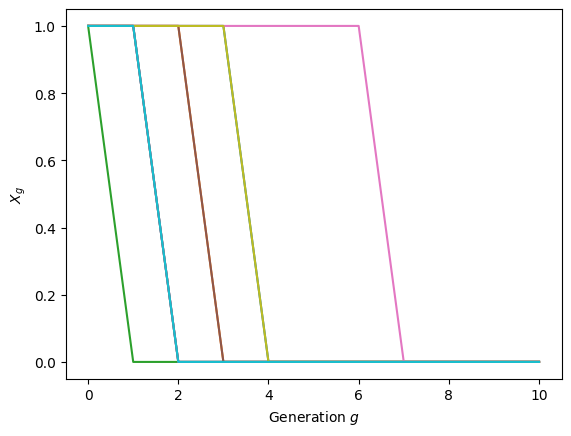

In [12]:
import matplotlib.pyplot as plt

for counter in range(10):
    Xlist = GaltonWatsonSimulation(CoinFlip)
    plt.plot(Xlist)

plt.xlabel('Generation $g$')
plt.ylabel('$X_g$')

plt.show()


Although there are $10$ simulations, only a few are visible.  They lie on top of each other.  Extinction occurs once the first `tails` appears.  About half of the simulations are expected to be `tails` first.  Of the remaining half, about half get a `heads` and then `tails`.  Of the remaining quarter, similar patterns continue.  As soon as the first tails occurs, the process stops.


Now we'll try the die roll.  Notice that extinction is not possible (why? - convince yourself before continuing).  The numbers will grow rather fast, so we'll look at both logarithmic and linear scales. 

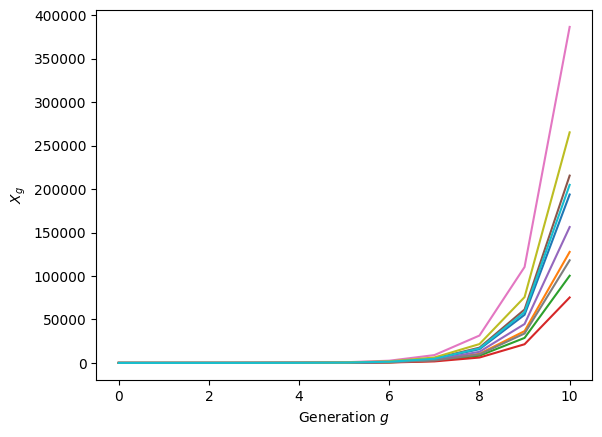

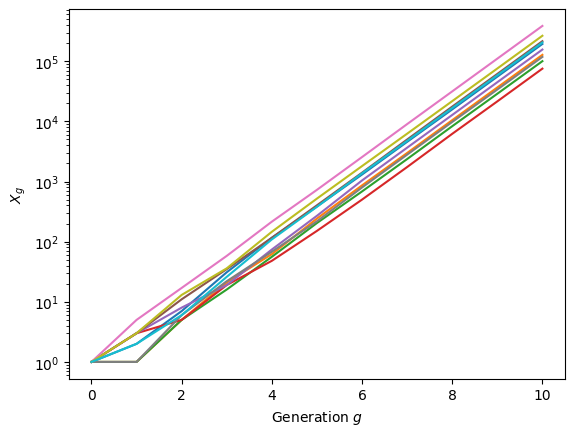

In [9]:
for counter in range(10):
    Xlist = GaltonWatsonSimulation(DieRoll)
    plt.figure(1)
    plt.plot(Xlist)
    plt.figure(2)
    plt.semilogy(Xlist)

plt.figure(1)
plt.xlabel('Generation $g$')
plt.ylabel('$X_g$')

plt.figure(2)
plt.xlabel('Generation $g$')
plt.ylabel('$X_g$')

plt.show()


Notice that at early times, things are relatively random, but at later times we seem to have parallel straight lines in the logarithmic plot.  We'll learn more about this later, but we can see that the early random details are important and have long-term effects, but once the size is pretty large, further random effects are not significant.


As our final example, we'll do a case where with probability $1/3$ we'll flip the coin and with probability $2/3$ we'll roll the die.  Here extinction is possible.  We'll run more simulations to increase the chance of seeing extinction.  

We will use the function `rand` which produces a random number uniformly between $0$ and $1$.  With probability $1/3$ it is less than $1/3$, so if the random number is less than $1/3$, we'll flip a coin, otherwise we'll roll the die.

We will add some steps to the code to count how many simulations are extinct by generation $g$.

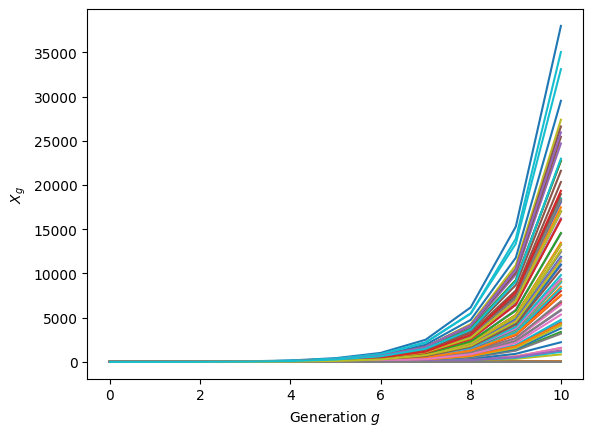

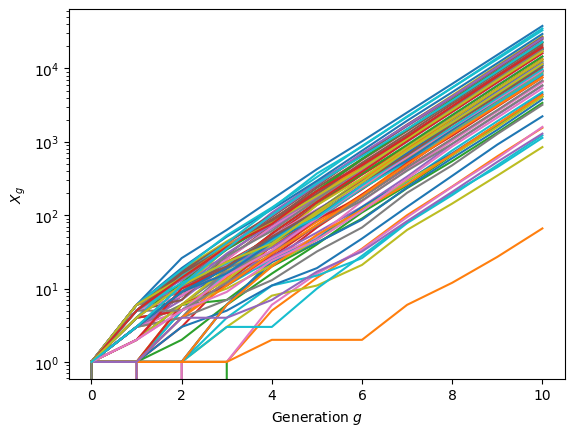

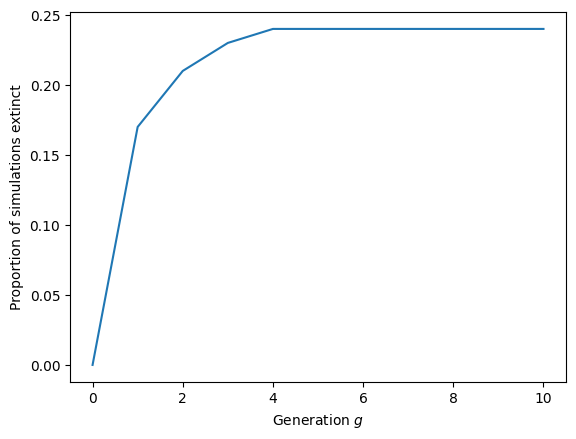

In [7]:
def mixedDist():
    """
    Offspring distribution for a Galton–Watson branching process made up of a mixture of two distributions.

    This function randomly selects which offspring distribution to use
    for a given individual:
      - With probability 1/3, it draws offspring from CoinFlip()
      - With probability 2/3, it draws offspring from DieRoll()

    Returns
    -------
    int
        The number of offspring produced by a single individual,
        as determined by the selected distribution.
    """
    if np.random.rand() < 1/3:
        return CoinFlip()
    else:
        return DieRoll()


# Number of generations to simulate (generations 0 through num_gens)
num_gens = 10

# Number of independent Galton–Watson simulations to run
num_sims = 100

# Array to store the number of simulations that are extinct
# at each generation g = 0, 1, ..., num_gens
extinction_count_by_gen = np.array([0] * (num_gens + 1))

# Run multiple independent simulations
for counter in range(num_sims):
    # Simulate a single Galton–Watson process using the mixed distribution
    # Xlist[g] is the population size in generation g
    Xlist = GaltonWatsonSimulation(mixedDist, num_generations=num_gens)

    # Check for extinction (population size = 0) at each generation
    for gen in range(num_gens + 1):
        if Xlist[gen] == 0:
            extinction_count_by_gen[gen] += 1

    # Plot the population size by generation on a linear scale
    plt.figure(1)
    plt.plot(Xlist)

    # Plot the population size by generation on a logarithmic y-scale
    plt.figure(2)
    plt.semilogy(Xlist)

# Label the linear-scale plot
plt.figure(1)
plt.xlabel('Generation $g$')
plt.ylabel('$X_g$')

# Label the log-scale plot
plt.figure(2)
plt.xlabel('Generation $g$')
plt.ylabel('$X_g$')

# Plot the proportion of simulations extinct by each generation
plt.figure(3)
plt.plot(extinction_count_by_gen / num_sims)
plt.xlabel('Generation $g$')
plt.ylabel('Proportion of simulations extinct')

plt.show()

## Self-test

1. Read over the Galton-Watson process simulation code.  Once you feel you understand it, rewrite the method, without using any AI autocomplete functions or reading of the code provided.  The variable names can be different.  In principle, if you know python well, you may be able to "refactor" the code in another way if you wish.  Any time you write a new piece of code, you should test to make sure it works in cases you understand well.  So we'll do some testing.
   1. If your attempt does not work, review the code, and identify the error and repeat until you have running code
   2. Run the provided code for the coin flip for $1000$ simulations up to 10 generations to get $X_g$.  
   3. Verify in your stochastic simulations that $X_g \in \{0,1\}$ and that $P(X_g=1) \approx 0.5^g$.
   4. Explain why the combined number of heads in all $1000$ simulations should be about $1000$ (Hint: how many heads do you expect in the first generation?  How many in the second? etc.)  Check that you see this in the simulation.

2. Now consider the DieRoll distribution.  We will compare your method with the provided method to ensure that they are consistent:
   1. Run a large number of simulations up to generation $2$ to calculate $X_2$ using the DieRoll method.  Plot a histogram of $X_2$.  (you will probably need to look up documentation for the Python histogram methods - an AI program may be the most efficient way to learn the right way to implement the histogram.).
   2. Repeat with the provided code.  
   3. Compare the distribution of $X_2$ as calculated by your code and by the provided code.  Verify by eye that they are similar.

3. Create a new offspring distribution producing $0, 1, 2, 3$ with equal probabilities.  Run 1000 simulations with this distribution up to generation $2$.  For reference consider the function $\mu(x) = (1 + x + x^2 + x^3)/4$.
   1. Based on your simulations, estimate the probability $\alpha_1$ that $X_1=0$.  That is find $\alpha_1 = \mathbb{P}(X_1=0)$ based on your simulations.  Compare with $\mu(0)$.  Can you explain why these should be similar?
   2. Estimate the probability $\alpha_2 = \mathbb{P}(X_2=0)$.  Compare with $\mu(\mu(0))$.  
   3. *Challenge*: Can you explain why $\alpha_2 \approx \mu(\mu(0))$ (we will study this in detail later)?  (hint - what is the probability that $X_1=j$ and that there is extinction at generation $2$ given $X_1=j$?)



